In [4]:
#cell:1

# Standard Library
import os
import re
import logging
import warnings
import multiprocessing

# Suppress warnings
warnings.filterwarnings("ignore")
logging.basicConfig(level=logging.INFO)

# Data Handling and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Text Processing and Modeling
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

# Preprocessing
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rosym\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rosym\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
from sklearn.datasets import fetch_20newsgroups

# Load dataset
newsgroups = fetch_20newsgroups(subset='all', shuffle=True, remove=('headers', 'footers', 'quotes'))

# Convert to DataFrame
import pandas as pd
df = pd.DataFrame({'text': newsgroups.data, 'target': newsgroups.target})
df['target_name'] = df['target'].apply(lambda i: newsgroups.target_names[i])

# Show a preview
print("Total documents:", len(df))
df.head()


Total documents: 18846


,text,target,target_name
0,\n\nI am sure some bashers of Pens fans are pr...,10,rec.sport.hockey
1,My brother is in the market for a high-perform...,3,comp.sys.ibm.pc.hardware
2,\n\n\n\n\tFinally you said what you dream abou...,17,talk.politics.mideast
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,3,comp.sys.ibm.pc.hardware
4,1) I have an old Jasmine drive which I cann...,4,comp.sys.mac.hardware


In [6]:
# Cell 3: Text Preprocessing

import re
import string

# Function to clean the text
def preprocess(text):
    # Convert to lowercase
    text = text.lower()
    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # Remove digits and punctuation
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply preprocessing to all documents
df['clean_text'] = df['text'].apply(preprocess)

# Preview cleaned text
df[['clean_text']].head()


,clean_text
0,i am sure some bashers of pens fans are pretty...
1,my brother is in the market for a highperforma...
2,finally you said what you dream about mediterr...
3,think its the scsi card doing the dma transfer...
4,i have an old jasmine drive which i cannot use...


In [7]:
# Cell 4: TF-IDF Vectorization

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

# Fit and transform the cleaned text
tfidf_matrix = tfidf_vectorizer.fit_transform(df['clean_text'])

# Shape of the resulting matrix
print("TF-IDF matrix shape:", tfidf_matrix.shape)


TF-IDF matrix shape: (18846, 44377)


In [8]:
# Cell 5: Topic Modeling with LDA

from sklearn.decomposition import LatentDirichletAllocation

# Initialize LDA model
lda_model = LatentDirichletAllocation(n_components=10, max_iter=10, learning_method='online', random_state=42)

# Fit the model
lda_output = lda_model.fit_transform(tfidf_matrix)

# Shape of the topic distribution per document
print("LDA output shape (documents x topics):", lda_output.shape)


LDA output shape (documents x topics): (18846, 10)


In [9]:
# Cell 6: Display Top Keywords for Each Topic

def display_topics(model, feature_names, no_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}: ", end="")
        print(" | ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Display top 10 keywords per topic
tf_feature_names = tfidf_vectorizer.get_feature_names_out()
display_topics(lda_model, tf_feature_names, no_top_words=10)


Topic 1: people | dont | just | think | like | know | good | time | im | god
Topic 2: dino | embalmer | umanitoba | jorg | klinger | ll | horizons | parametric | poke | ik
Topic 3: nmyi | feustel | tia | rosicrucian | oto | bentsen | refrigerator | muenchen | erreys | harvested
Topic 4: cipher | nanao | biker | oz | asap | snail | flyback | foreground | mydisplay | jaguar
Topic 5: thanks | windows | email | use | know | does | drive | card | file | im
Topic 6: laserwriter | bel | maxima | camcorder | wheelies | straights | tvs | infiniti | spooge | nikon
Topic 7: geico | vmax | subscrive | capslock | xcopyarea | proventil | nonsteroid | modmask | frode | bonn
Topic 8: spice | inguiry | reinstalling | awd | antihistamine | sedative | xtvaappinitialize | aamir | qazi | weasel
Topic 9: game | team | games | hockey | players | season | play | teams | league | win
Topic 10: maxaxaxaxaxaxaxaxaxaxaxaxaxaxax | joystick | blah | manta | turkey | christmas | leftover | truelove | oort | istanbul

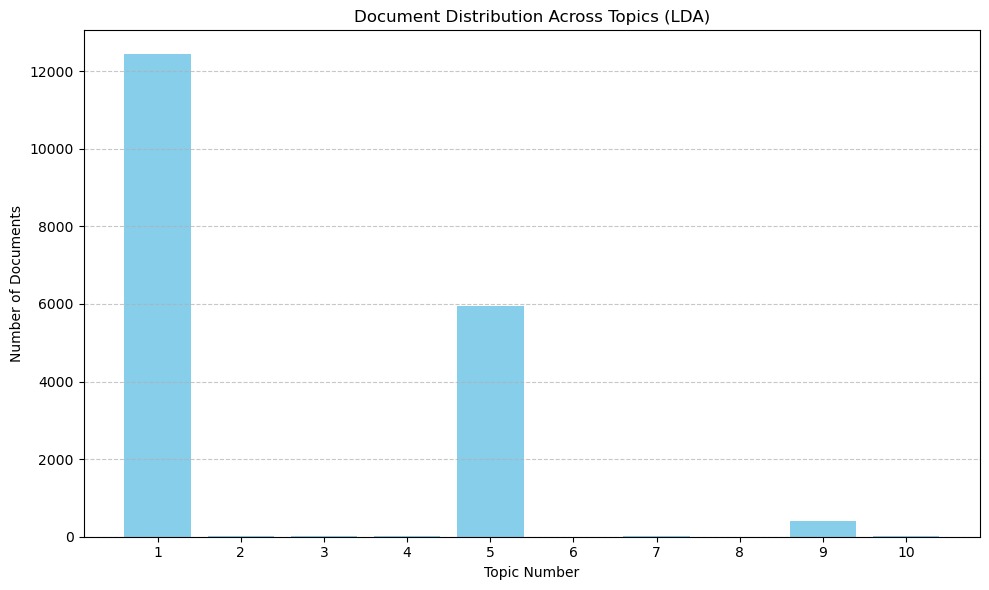

In [10]:
# Cell 7: Visualize Document-Topic Distribution (Dominant Topic Per Doc)

import numpy as np
import matplotlib.pyplot as plt

# Find dominant topic for each document
dominant_topics = np.argmax(lda_output, axis=1)

# Count how many documents belong to each topic
topic_counts = np.bincount(dominant_topics)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(topic_counts)+1), topic_counts, color='skyblue')
plt.xlabel("Topic Number")
plt.ylabel("Number of Documents")
plt.title("Document Distribution Across Topics (LDA)")
plt.xticks(range(1, len(topic_counts)+1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



🌀 Word Cloud for Topic 1


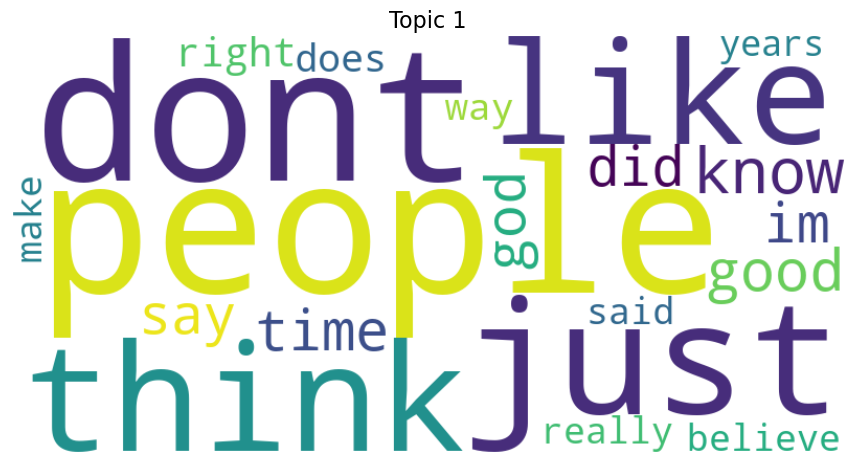


🌀 Word Cloud for Topic 2


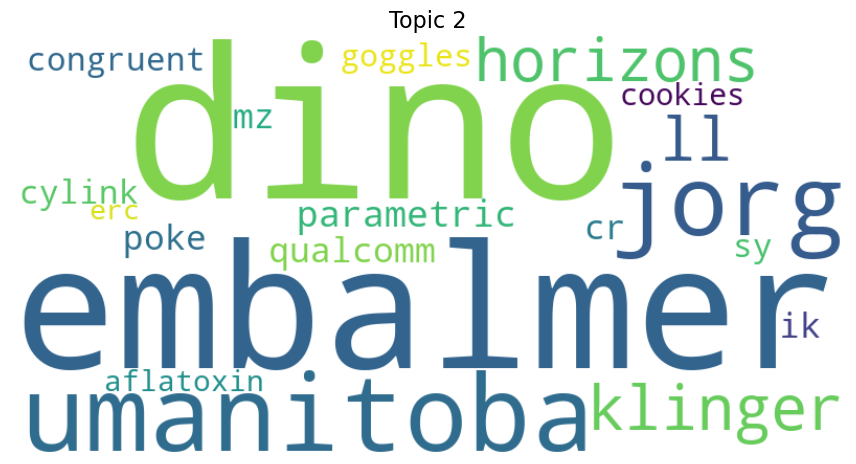


🌀 Word Cloud for Topic 3


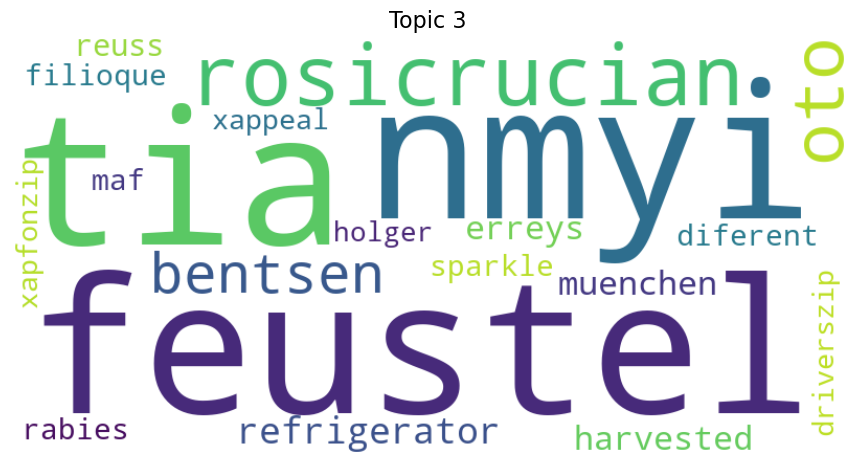


🌀 Word Cloud for Topic 4


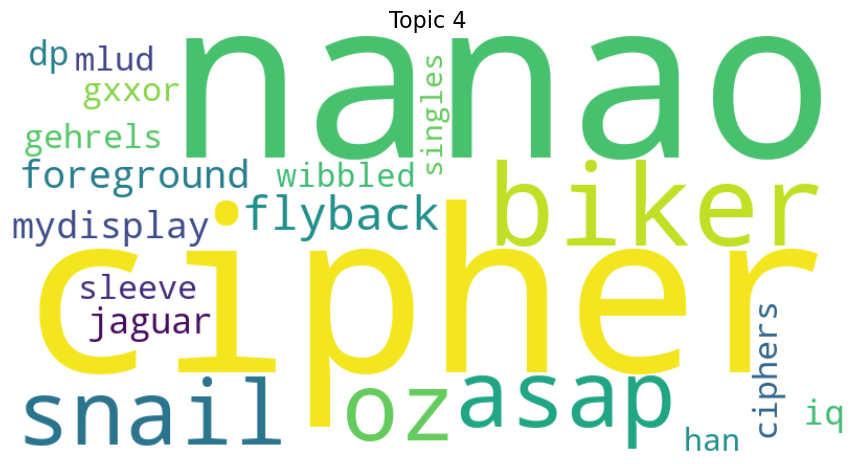


🌀 Word Cloud for Topic 5


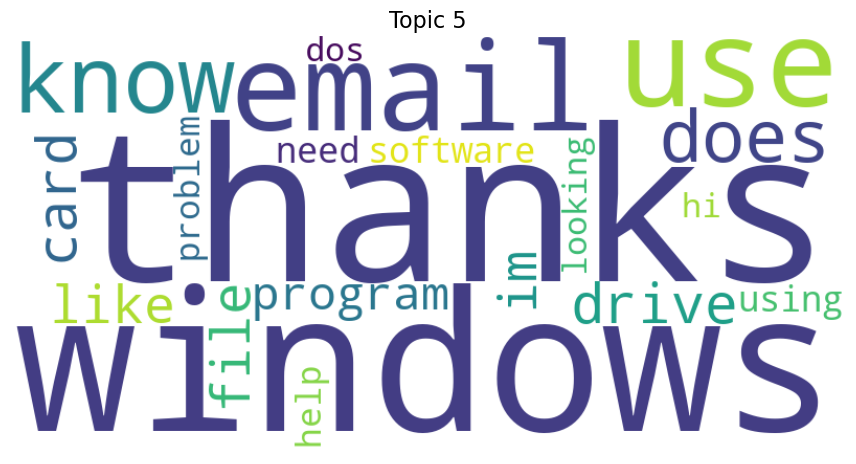


🌀 Word Cloud for Topic 6


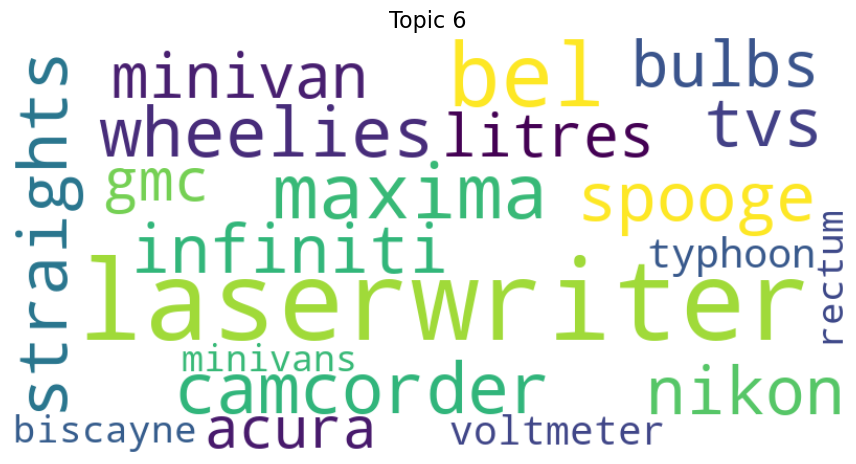


🌀 Word Cloud for Topic 7


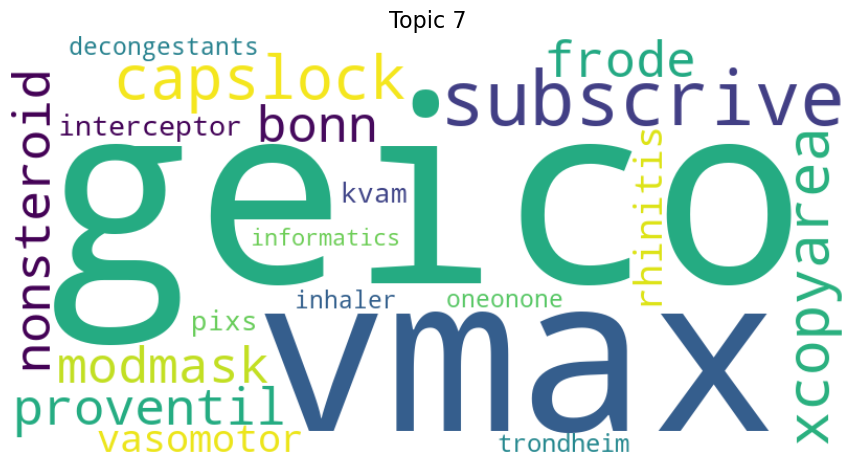


🌀 Word Cloud for Topic 8


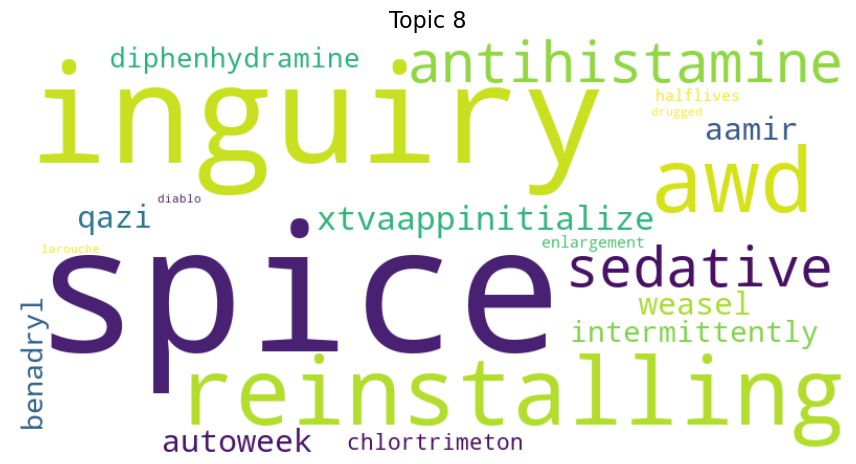


🌀 Word Cloud for Topic 9


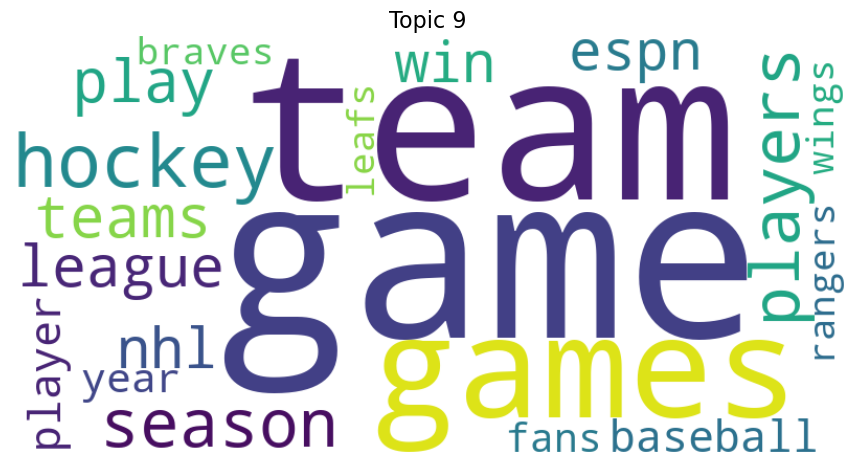


🌀 Word Cloud for Topic 10


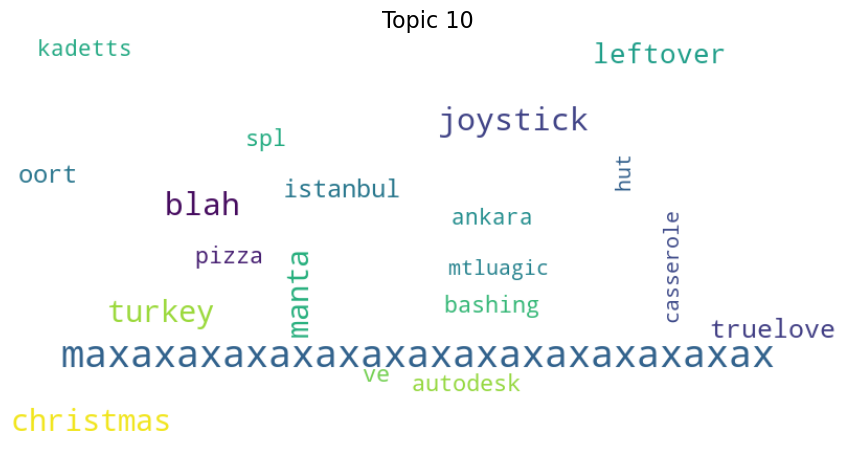

In [11]:
# Cell 8: Generate Word Clouds for Each Topic

from wordcloud import WordCloud

# Generate word cloud for each topic
for topic_idx, topic in enumerate(lda_model.components_):
    print(f"\n🌀 Word Cloud for Topic {topic_idx + 1}")
    word_freq = {tf_feature_names[i]: topic[i] for i in topic.argsort()[:-21:-1]}  # Top 20 words
    
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          colormap='viridis').generate_from_frequencies(word_freq)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Topic {topic_idx + 1}", fontsize=16)
    plt.tight_layout(pad=2)
    plt.show()


In [12]:
# Cell 9: TruncatedSVD + KMeans Clustering

from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans

# Reduce dimensionality of TF-IDF vectors
svd = TruncatedSVD(n_components=100, random_state=42)
reduced_matrix = svd.fit_transform(tfidf_matrix)

# Apply KMeans on the reduced data
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(reduced_matrix)

# Save cluster labels
df['kmeans_cluster'] = kmeans.labels_

# Function to print top terms per cluster from SVD components
def print_cluster_terms(model, feature_names, n_terms=10):
    centroids = model.cluster_centers_
    for idx, centroid in enumerate(centroids):
        top_indices = centroid.argsort()[-n_terms:][::-1]
        terms = [feature_names[i] for i in top_indices]
        print(f"Cluster {idx+1} top terms: {', '.join(terms)}")

# Use original TF-IDF feature names
tf_feature_names = tfidf_vectorizer.get_feature_names_out()
print_cluster_terms(kmeans, tf_feature_names, n_terms=10)



Cluster 1 top terms: aah, aa, aaa, aarhus, aaron, abbott, abandon, abc, abhin, abandoning
Cluster 2 top terms: aaaaa, aa, aah, aamir, aap, aarons, aanerud, aaplay, aas, abba
Cluster 3 top terms: aa, aap, aaron, aaplay, aarons, abandon, abbott, aas, abbreviations, abandoned
Cluster 4 top terms: aa, aaa, aanerud, aarons, aaaaa, aarhus, abcdef, abd, ab, abandoned
Cluster 5 top terms: aa, aarp, abdominal, aawin, abandoned, abdul, ab, abe, abovementioned, abrogate
Cluster 6 top terms: aa, aaa, aamir, aaaaa, aas, aarp, aaron, aap, ably, abandoning
Cluster 7 top terms: aa, aamir, aap, aanerud, aaron, aarhus, abandoning, abhorrent, ababa, aarp
Cluster 8 top terms: aa, aaa, abbot, ababa, abduct, abducted, aaplay, aberrant, aborted, abolishment
Cluster 9 top terms: aa, aarhus, abandons, aaron, abhorent, abolished, abilities, abode, abcs, ababa
Cluster 10 top terms: aarhus, abandoned, aa, abcdef, abbot, abbreviations, aas, abba, aarp, ab


In [14]:
# Cell 11: Compare Top Terms – LDA vs KMeans (Reduced for speed)

print("\n📌 Top Terms per LDA Topic:\n")
for idx, topic in enumerate(lda_model.components_[:3]):
    top_indices = topic.argsort()[-10:][::-1]
    terms = [tf_feature_names[i] for i in top_indices]
    print(f"LDA Topic {idx+1}: {', '.join(terms)}")

print("\n📌 Top Terms per KMeans Cluster:\n")
print_cluster_terms(kmeans, tf_feature_names, n_terms=10)



📌 Top Terms per LDA Topic:

LDA Topic 1: people, dont, just, think, like, know, good, time, im, god
LDA Topic 2: dino, embalmer, umanitoba, jorg, klinger, ll, horizons, parametric, poke, ik
LDA Topic 3: nmyi, feustel, tia, rosicrucian, oto, bentsen, refrigerator, muenchen, erreys, harvested

📌 Top Terms per KMeans Cluster:

Cluster 1 top terms: aah, aa, aaa, aarhus, aaron, abbott, abandon, abc, abhin, abandoning
Cluster 2 top terms: aaaaa, aa, aah, aamir, aap, aarons, aanerud, aaplay, aas, abba
Cluster 3 top terms: aa, aap, aaron, aaplay, aarons, abandon, abbott, aas, abbreviations, abandoned
Cluster 4 top terms: aa, aaa, aanerud, aarons, aaaaa, aarhus, abcdef, abd, ab, abandoned
Cluster 5 top terms: aa, aarp, abdominal, aawin, abandoned, abdul, ab, abe, abovementioned, abrogate
Cluster 6 top terms: aa, aaa, aamir, aaaaa, aas, aarp, aaron, aap, ably, abandoning
Cluster 7 top terms: aa, aamir, aap, aanerud, aaron, aarhus, abandoning, abhorrent, ababa, aarp
Cluster 8 top terms: aa, aaa,

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


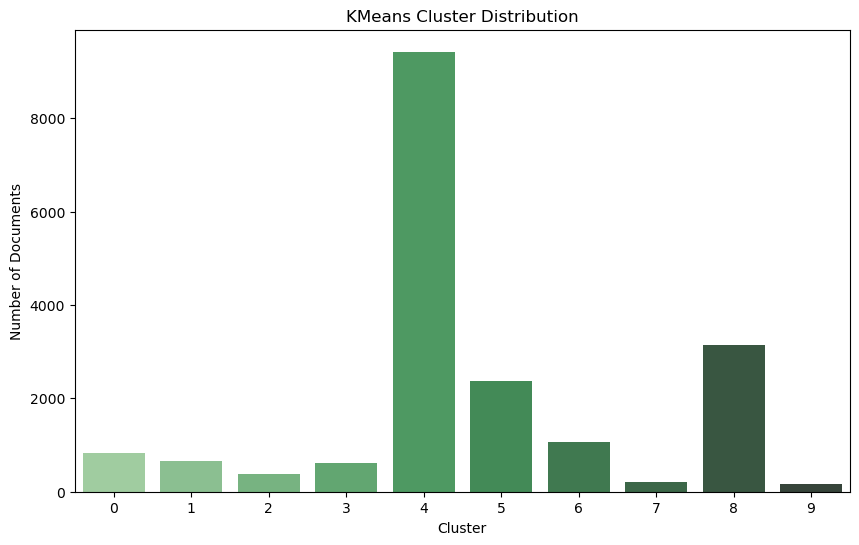

In [15]:
# Cell 13: 📊 KMeans Cluster Distribution Visualization

kmeans_cluster_counts = df['kmeans_cluster'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=kmeans_cluster_counts.index, y=kmeans_cluster_counts.values, palette="Greens_d")
plt.title("KMeans Cluster Distribution")
plt.xlabel("Cluster")
plt.ylabel("Number of Documents")
plt.show()


In [20]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the data
newsgroups_data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
documents = newsgroups_data.data

# Vectorize the text
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.5)
tfidf_matrix = vectorizer.fit_transform(documents)



In [21]:
from sklearn.cluster import KMeans

# Perform clustering
k = 10
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans_labels = kmeans.fit_predict(tfidf_matrix)


In [22]:

import pandas as pd

# Create DataFrame with document index and their cluster
doc_cluster_df = pd.DataFrame({
    'Document_Index': range(len(documents)),
    'Cluster_Label': kmeans_labels
})

# Count documents in each cluster
cluster_counts = doc_cluster_df['Cluster_Label'].value_counts().sort_index().reset_index()
cluster_counts.columns = ['Cluster_Label', 'Document_Count']

# Save to CSV
output_path = 'kmeans_cluster_summary.csv'
cluster_counts.to_csv(output_path, index=False)

print(f"✅ Summary saved to: {output_path}")


✅ Summary saved to: kmeans_cluster_summary.csv
